<a href="https://colab.research.google.com/github/trinalvf/final_year_project/blob/main/MachineLearning/KNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Feature Analysis:** Ignoring 'flow_id','timestamp','flags','hard_timeout','idle_timeout' as they are irrelevant in predicting the attack.

In [ ]:
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
flow_dataset = pd.read_csv('/content/drive/MyDrive/dataset.csv')

flow_dataset = flow_dataset.drop(columns=['flow_id','timestamp','flags','hard_timeout','idle_timeout'])


flow_dataset1 = flow_dataset.iloc[:5000,:]
flow_dataset2 = flow_dataset.iloc[125640:130640,:]
flow_dataset = pd.concat([flow_dataset1, flow_dataset2], ignore_index=True)

flow_dataset.iloc[:, 1] = flow_dataset.iloc[:, 1].str.replace('.', '')
flow_dataset.iloc[:, 3] = flow_dataset.iloc[:, 3].str.replace('.', '')
#flow_dataset.iloc[:, 4] = flow_dataset.iloc[:, 4].str.replace('.', '')

X_flow = flow_dataset.iloc[:, :-1].values
X_flow = X_flow.astype('float64')

y_flow = flow_dataset.iloc[:, -1].values

X_flow_train, X_flow_test, y_flow_train, y_flow_test = train_test_split(X_flow, y_flow, test_size=0.25, random_state=0)

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
flow_model = classifier.fit(X_flow_train, y_flow_train)

y_flow_pred = flow_model.predict(X_flow_test)


print("Confusion Matrix")
cm = confusion_matrix(y_flow_test, y_flow_pred)
print(cm)

acc = accuracy_score(y_flow_test, y_flow_pred)

print("Success Accuracy = {0:.2f} %".format(acc*100))
fail = 1.0 - acc
print("Fail Accuracy = {0:.2f} %".format(fail*100))

Confusion Matrix
[[1263    0]
 [  24 1213]]
Success Accuracy = 99.04 %
Fail Accuracy = 0.96 %


In [ ]:
flow_dataset.head()

,timestamp,datapath_id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flow_duration_nsec,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
0,1.589933e+09,1,10001505010003542466,10001,5050,10003,54246,6,-1,-1,4,480000000,20,100,0,50776,3351216,12694.00,1.057833e-04,8.378040e+05,6.981700e-03,0
1,1.589933e+09,1,10003542461000150506,10003,54246,10001,5050,6,-1,-1,4,486000000,20,100,0,209360,11834974848,52340.00,4.307819e-04,2.958744e+09,2.435180e+01,0
2,1.589933e+09,1,10003542461000550501,10003,54246,10005,5050,1,0,8,4,484000000,20,100,0,3,294,0.75,6.198347e-09,7.350000e+01,6.074380e-07,0
3,1.589933e+09,1,10005542461000350501,10005,54246,10003,5050,1,0,0,4,415000000,20,100,0,3,294,0.75,7.228916e-09,7.350000e+01,7.084337e-07,0
4,1.589933e+09,2,1000301000501,10003,0,10005,0,1,0,8,4,423000000,20,100,0,3,294,0.75,7.092199e-09,7.350000e+01,6.950355e-07,0


From the learning curve, we can determine where our model is overfitting or not. By looking at the following learning curve, we can confirm that our model is not overfitting. 

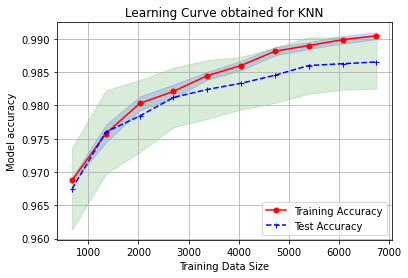

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=classifier, X=X_flow_train, y=y_flow_train,cv=10, train_sizes=np.linspace(0.1, 1.0, 10),n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='blue', marker='+', markersize=5, linestyle='--', label='Test Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve obtained for KNN')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

**Following analysis is done in per-feature basis where we have calculated how each feature accurately affect to our final prediction.**

In [ ]:
from sklearn.model_selection import cross_val_score

n_feats = X_flow_train.shape[1]

print('Feature  Accuracy')
for i in range(n_feats):
    X = X_flow_train[:, i].reshape(-1, 1)
    scores = cross_val_score(classifier, X, y_flow_train, cv=3)
    print(f'{i}        {scores.mean():g}')

Feature  Accuracy
0        0.901467
1        0.999733
2        0.912267
3        0.9924
4        0.912267
5        0.786133
6        0.6356
7        0.8388
8        0.870667
9        0.7052
10        0.966267
11        0.968133
12        0.959333
13        0.959333
14        0.959333
15        0.959333


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_flow_test,y_flow_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1263
           1       1.00      0.98      0.99      1237

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500



**Ignoring ['packet_count','byte_count','packet_count_per_second','packet_count_per_nsecond','byte_count_per_second',byte_count_per_nsecond]**

Here we have ignored the most significant features that provide higher accuracies in order to further confirm the fact that our model is not overfitted. If we are able to obtain an accuracy of less than or approximately equal to 80% then we can confirm that our model is not overfitting since we have removed the most significant features.  

In [ ]:
flow_dataset = pd.read_csv('/content/drive/MyDrive/dataset.csv')

flow_dataset = flow_dataset.drop(columns=['timestamp','ip_src','ip_dst','datapath_id','flow_id','packet_count','byte_count','packet_count_per_second','packet_count_per_nsecond','byte_count_per_second','byte_count_per_nsecond'])


flow_dataset1 = flow_dataset.iloc[:5000,:]
flow_dataset2 = flow_dataset.iloc[125640:130640,:]
flow_dataset = pd.concat([flow_dataset1, flow_dataset2], ignore_index=True)

#flow_dataset.iloc[:, 2] = flow_dataset.iloc[:, 2].str.replace('.', '')
#flow_dataset.iloc[:, 0] = flow_dataset.iloc[:, 0].str.replace('.', '')
#flow_dataset.iloc[:, 5] = flow_dataset.iloc[:, 5].str.replace('.', '')

X_flow = flow_dataset.iloc[:, :-1].values
X_flow = X_flow.astype('float64')

y_flow = flow_dataset.iloc[:, -1].values

X_flow_train, X_flow_test, y_flow_train, y_flow_test = train_test_split(X_flow, y_flow, test_size=0.25, random_state=0)

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
flow_model = classifier.fit(X_flow_train, y_flow_train)

y_flow_pred = flow_model.predict(X_flow_test)


print("Confusion Matrix")
cm = confusion_matrix(y_flow_test, y_flow_pred)
print(cm)

acc = accuracy_score(y_flow_test, y_flow_pred)

print("Success Accuracy = {0:.2f} %".format(acc*100))
fail = 1.0 - acc
print("Fail Accuracy = {0:.2f} %".format(fail*100))

Confusion Matrix
[[ 880  383]
 [  86 1151]]
Success Accuracy = 81.24 %
Fail Accuracy = 18.76 %
